# Exploratory Data Analysis (EDA)

In [20]:
# Vamos começar importando as bibliotecas e o conjunto de dados a serem usados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style


In [21]:
wine_quality = pd.read_csv("../bases/winequality-red.csv", sep = ",")

In [22]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
# Vamos ver as últimas 5 linhas
wine_quality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [24]:
#linhas e colunas 
print(wine_quality.shape)

(1599, 12)


In [25]:
# nome dos atributos/colunas
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Provavelmente se não somos conhecedores de vinhos, estas variáveis ​​fazem pouco sentido para nós. Lembremos que o ideal é que tenhamos conhecimento do assunto que vamos trabalhar (claro que também podemos contratar um especialista para nos orientar 😉).

Para mais informações sobre o significado de cada variável, podemos acessar os seguintes links:
* https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid
* https://waterhouse.ucdavis.edu/whats-in-wine
* https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/
* https://www.mt.com/gb/en/home/supportive_content/ana_chem_applications/titration/AP015.html

In [26]:
#Tipo de dato para cada columna
wine_quality.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Completude dos dados**:
Antes de iniciar qualquer análise, é bom revisar os dados em busca de informações faltantes; e se houver, decidir o que podemos fazer com esses registros ausentes. Com dataframes do pandas, podemos usar a função info() para encontrar os dados ausentes.

In [27]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
#Outra forma de obter as mesmas informações seria calcular todos os registros por colunas
wine_quality.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [29]:
#Antes de analizar lo principales estadísticos, verifiquemos si tenemos como estructura de dato un dataframe!
type(wine_quality)

pandas.core.frame.DataFrame

# Estadísticas descriptivas

In [30]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
# Vamos usar a função round para visualizar melhor nossos dados
wine_quality.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


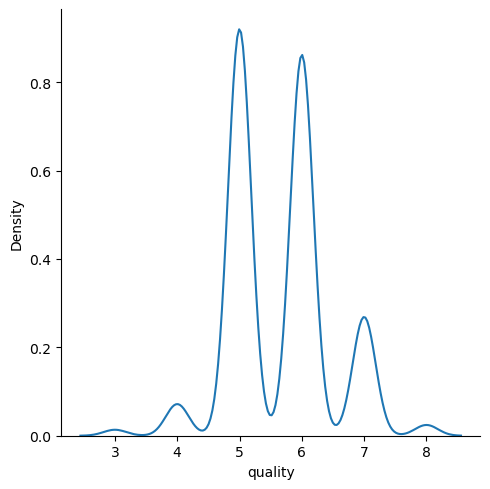

In [38]:
#Histograma
from seaborn import displot
displot(wine_quality.quality,kind="kde")

Como podemos ver, nosso conjunto de dados é desequilibrado, com muito mais 5 e 6 do que qualquer outro valor.

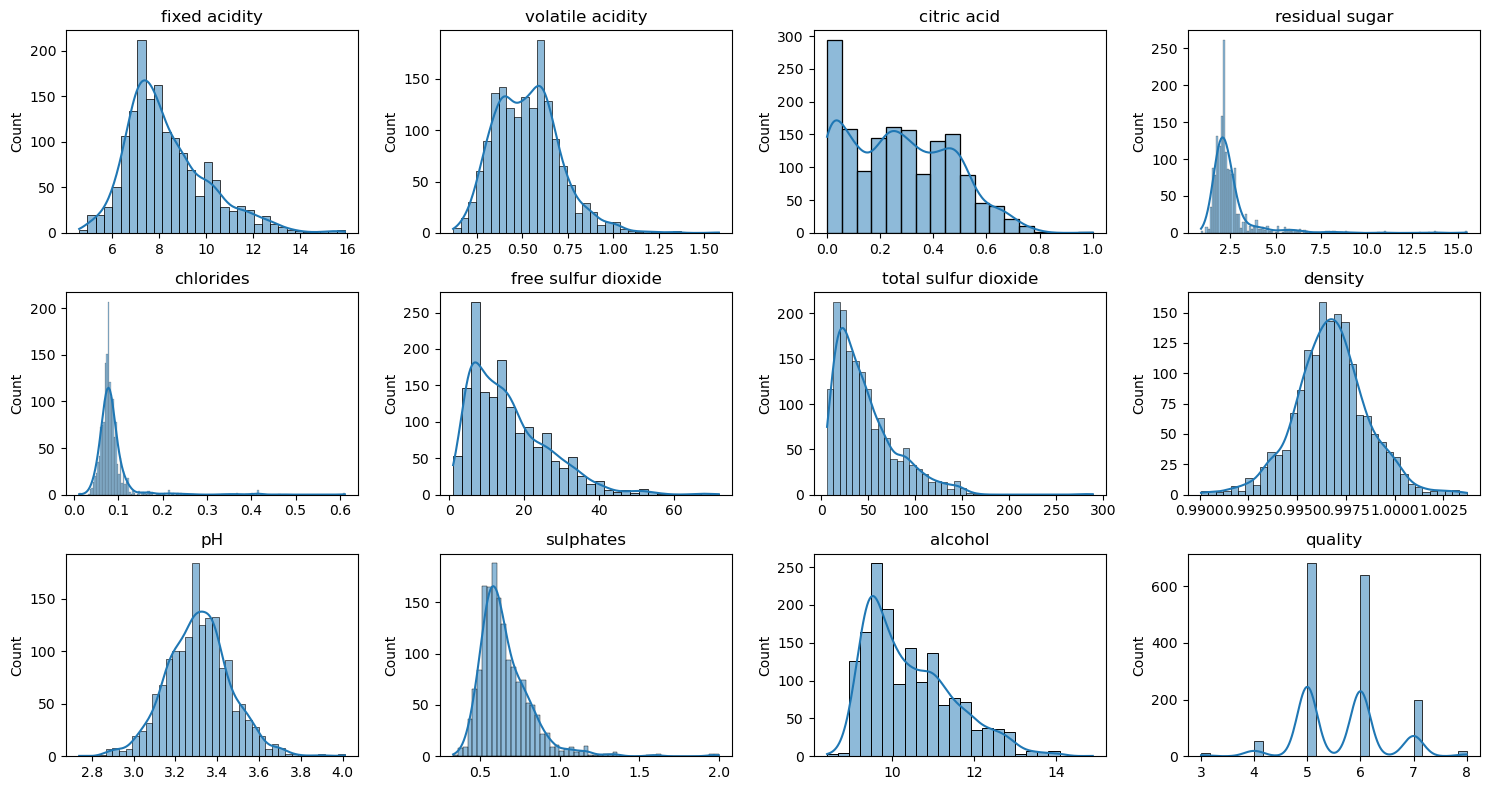

In [39]:
# Podemos usar um pouco de código para exibir mais de uma variável por vez
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol', 'quality']

columns = 4

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,8))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    #sns.distplot(wine_quality[variable], ax=axes[i][j])
    #sns.displot(wine_quality[variable], ax=axes[i][j],kde=True)
    sns.histplot(wine_quality[variable], ax=axes[i][j],kde=True)
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

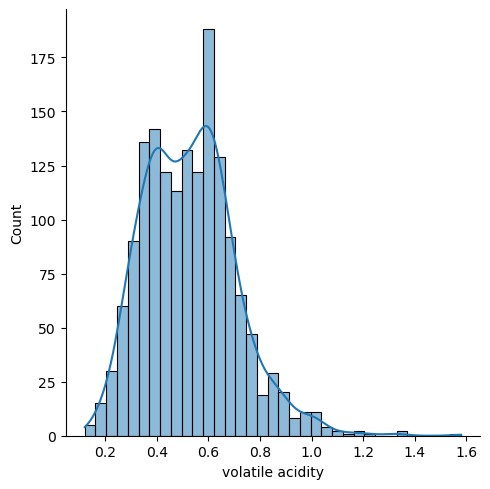

In [40]:
#Veamos otra variable!
displot(wine_quality["volatile acidity"],kde=True)

A partir deste gráfico podemos identificar vários aspectos, como, por exemplo, que muitas das variáveis apresentam distribuição assimétrica (acidez fixa, açúcar residual, cloretos, por exemplo), além do fato de alguns valores parecerem ter valores extremos (açúcar residual, sulfatos, dióxido de enxofre total).

# Boxplots
Como sabemos, os boxplots permitem-nos analisar e ver muito rapidamente quais variáveis têm valores extremos.

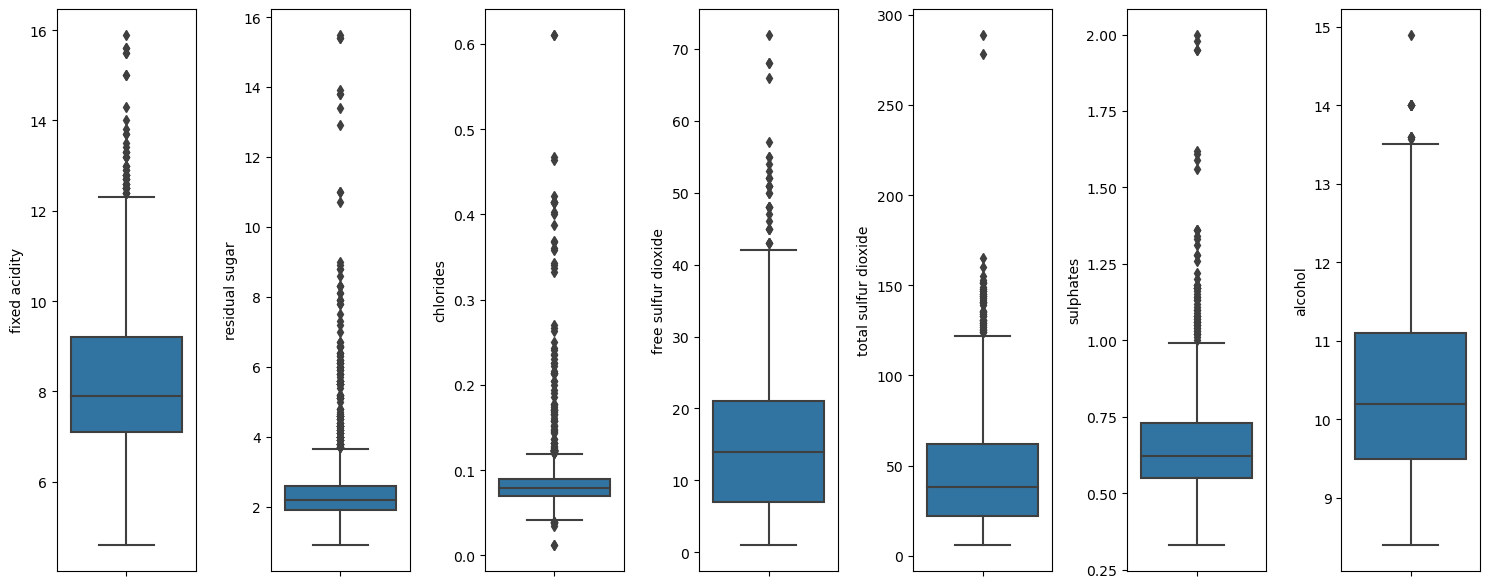

In [41]:
variables = ['fixed acidity', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide','sulphates', 'alcohol']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=wine_quality, ax=ax)
plt.tight_layout()

# Scatterplots
Agora vamos tentar identificar de forma rápida e visual a correlação entre as variáveis!

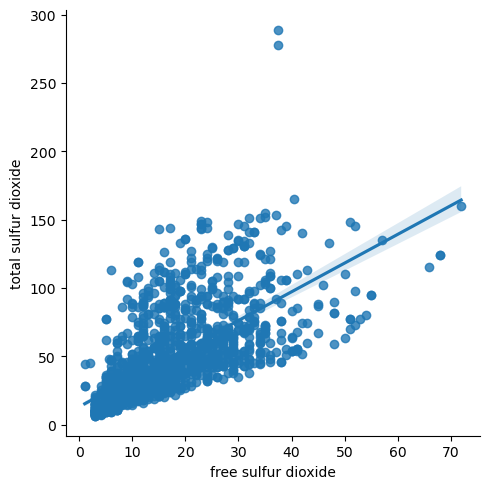

In [42]:
from seaborn import lmplot
lmplot(x='free sulfur dioxide', 
       y='total sulfur dioxide', 
       data=wine_quality, 
       fit_reg=True) 

No gráfico anterior pode-se observar uma clara relação entre as variáveis ​​analisadas. Também podemos
usar a Matriz de Correlação se quisermos ver, por exemplo, o coeficiente de **Pearson**

In [43]:
correlation = wine_quality.corr(method="pearson")
correlation.round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,-0.256,0.672,0.115,0.094,-0.154,-0.113,0.668,-0.683,0.183,-0.062,0.124
volatile acidity,-0.256,1.000,-0.552,0.002,0.061,-0.011,0.076,0.022,0.235,-0.261,-0.202,-0.391
citric acid,0.672,-0.552,1.000,0.144,0.204,-0.061,0.036,0.365,-0.542,0.313,0.110,0.226
residual sugar,0.115,0.002,0.144,1.000,0.056,0.187,0.203,0.355,-0.086,0.006,0.042,0.014
chlorides,0.094,0.061,0.204,0.056,1.000,0.006,0.047,0.201,-0.265,0.371,-0.221,-0.129
free sulfur dioxide,-0.154,-0.011,-0.061,0.187,0.006,1.000,0.668,-0.022,0.070,0.052,-0.069,-0.051
total sulfur dioxide,-0.113,0.076,0.036,0.203,0.047,0.668,1.000,0.071,-0.066,0.043,-0.206,-0.185
density,0.668,0.022,0.365,0.355,0.201,-0.022,0.071,1.000,-0.342,0.149,-0.496,-0.175
pH,-0.683,0.235,-0.542,-0.086,-0.265,0.070,-0.066,-0.342,1.000,-0.197,0.206,-0.058
sulphates,0.183,-0.261,0.313,0.006,0.371,0.052,0.043,0.149,-0.197,1.000,0.094,0.251


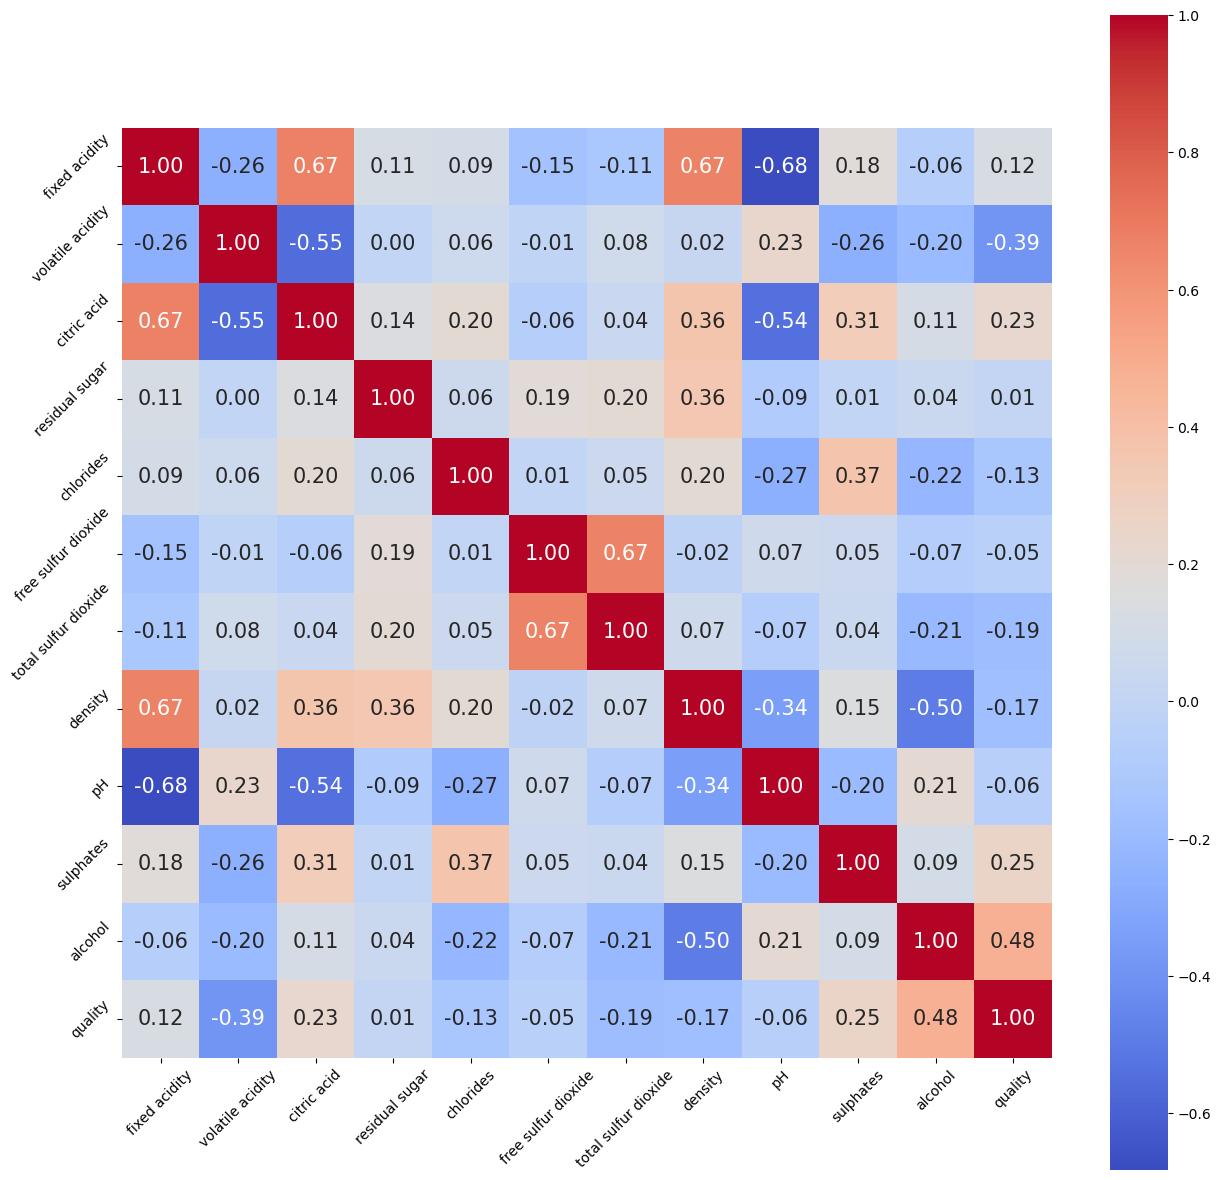

In [44]:

plt.figure(figsize=(15,15)) 

# Gera o mapa de calor
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

# Eu giro os eixos para que fiquem inclinados
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

# Complemento 😉

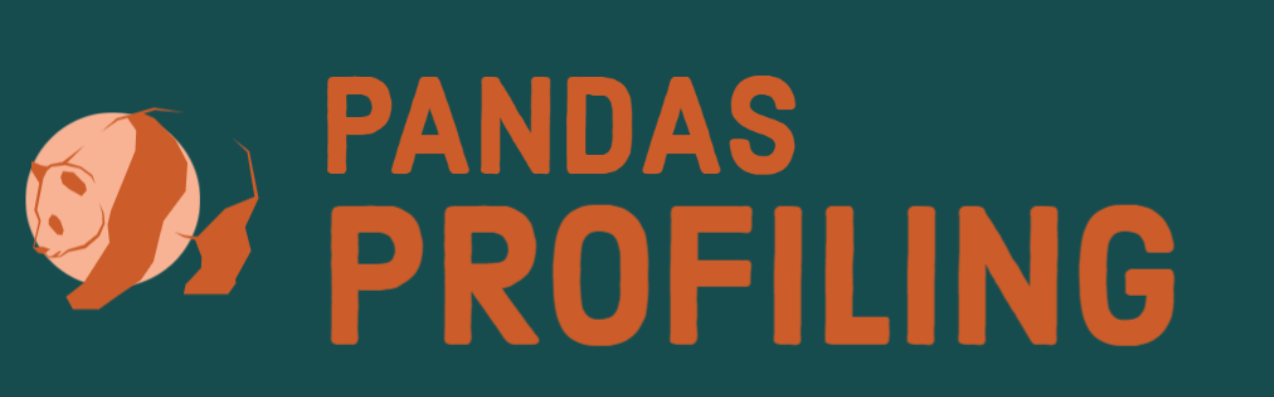

O perfil do Pandas é um módulo Python de código aberto com o qual podemos fazer análises exploratórias de dados rapidamente com apenas algumas linhas de código. Também gera relatórios interativos em formato web.

Link: https://pypi.org/project/pandas-profiling/

In [45]:
from pandas_profiling import ProfileReport
ProfileReport(wine_quality, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]